<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance

**Analyze Big Financial Data**

O'Reilly (2014)

Yves Hilpisch

<img style="border:0px solid grey;" src="http://hilpisch.com/python_for_finance.png" alt="Python for Finance" width="30%" align="left" border="0">

**Buy the book ** |
<a href='http://shop.oreilly.com/product/0636920032441.do' target='_blank'>O'Reilly</a> |
<a href='http://www.amazon.com/Yves-Hilpisch/e/B00JCYHHJM' target='_blank'>Amazon</a>

**All book codes & IPYNBs** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**The Python Quants GmbH** | <a href='http://tpq.io' target='_blank'>http://tpq.io</a>

**Contact us** | <a href='mailto:pff@tpq.io'>pff@tpq.io</a>

## Introduction

In [1]:
from pylab import plt
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'

## Finance and Python Syntax

In [2]:
S0 = 100.
K = 105.
T = 1.0
r = 0.05
sigma = 0.2

In [3]:
from numpy import *

I = 100000

random.seed(1000)
z = random.standard_normal(I)
ST = S0 * exp(r * T + sigma * sqrt(T) * z)
hT = maximum(ST - K, 0)
C0 = exp(-r * T) * sum(hT) / I

In [4]:
print("Value of the European Call Option %5.3f" % C0)

Value of the European Call Option 9.149


## Time-to-Results

In [5]:
import numpy as np
import pandas as pd

In [6]:
# data from Thomson Reuters Eikon API
raw = pd.read_csv('source/tr_eikon_eod_data.csv',
                   index_col=0, parse_dates=True)
amzn = pd.DataFrame(raw['AMZN.O'])
amzn.columns = ['Close']
amzn.tail()

,Close
Date,
2017-10-25,972.91
2017-10-26,972.43
2017-10-27,1100.95
2017-10-30,1110.85
2017-10-31,1105.28


In [7]:
amzn['Log_Ret'] = np.log(amzn['Close'] / amzn['Close'].shift(1))
amzn['Volatility'] = amzn['Log_Ret'].rolling(window=252).std() * np.sqrt(252)

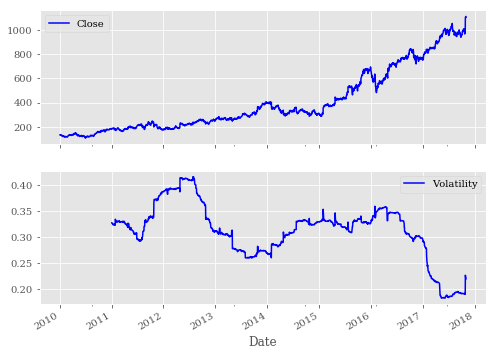

In [8]:
%matplotlib inline
amzn[['Close', 'Volatility']].plot(subplots=True, color='blue',
                                   figsize=(8, 6), grid=True);
# tag: amzn_vola
# title: Amazon closing prices and yearly volatility

## Paradigm

In [9]:
loops = 2500000
from math import *
a = range(1, loops)
def f(x):
    return 3 * log(x) + cos(x) ** 2
%timeit r = [f(x) for x in a]

1.3 s ± 60.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
import numpy as np
a = np.arange(1, loops)
%timeit r = 3 * np.log(a) + np.cos(a) ** 2

103 ms ± 6.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
import numexpr as ne
ne.set_num_threads(1)
f = '3 * log(a) + cos(a) ** 2'
%timeit r = ne.evaluate(f)

45.4 ms ± 4.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
ne.set_num_threads(4)
%timeit r = ne.evaluate(f)

26.1 ms ± 3.57 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>

**Quant Platform** |
<a href="http://quant-platform.com">http://quant-platform.com</a>

**Python for Finance** |
<a href="http://python-for-finance.com" target="_blank">Python for Finance @ O'Reilly</a>

**Derivatives Analytics with Python** |
<a href="http://derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Listed Volatility and Variance Derivatives** |
<a href="http://lvvd.tpq.io" target="_blank">Listed VV Derivatives @ Wiley Finance</a>

**Python Training** |
<a href="http://training.tpq.io" target="_blank">Python for Finance University Certificate</a>